# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [96]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt

%matplotlib inline

In [98]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [17]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [18]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [19]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [20]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18947231,
            "id": 1,
            "last_updated": 1643844851,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 702461519927,
                    "percent_change_1h": -0.384459223277972,
                    "percent_change_24h": -4.79758176244135,
                    "percent_change_7d": 0.13179601405548,
                    "percentage_change_1h": -0.384459223277972,
                    "percentage_change_24h": -4.79758176244135,
                    "percentage_change_7d": 0.13179601405548,
                    "price": 37038.0,
                    "volume_24h": 16670239970
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18947231,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [21]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119420119,
            "id": 1027,
            "last_updated": 1643844777,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 321949822236,
                    "percent_change_1h": 0.308138465578994,
                    "percent_change_24h": -3.92479863702353,
                    "percent_change_7d": 9.1995891013945,
                    "percentage_change_1h": 0.308138465578994,
                    "percentage_change_24h": -3.92479863702353,
                    "percentage_change_7d": 9.1995891013945,
                    "price": 2692.01,
                    "volume_24h": 13658552083
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119420119,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [22]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'${btc_price:,.2f}')


$37,038.00


In [23]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'${eth_price:,.2f}')


$2,692.01


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [24]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'Current Value of BTC holding is: ${btc_value:,.2f}')

Current Value of BTC holding is: $44,445.60


In [25]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'Current Value of ETH holding is: ${eth_value:,.2f}')

Current Value of ETH holding is: $14,267.65


In [26]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Total crypto wallet value" ${total_crypto_wallet:,.2f}')

Total crypto wallet value" $58,713.25


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [27]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [114]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [30]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
today = dt.datetime.now()
offset = max(1, (today.weekday() + 6) % 7 - 3)
timedelta = dt.timedelta(offset)
most_recent = today - timedelta

print(f'Most recent trading day is: {most_recent.date()}')


Most recent trading day is: 2022-02-01


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [31]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_most_recent_df = alpaca.get_barset(tickers, timeframe=timeframe, limit=1, end=most_recent).df

# Review the first 5 rows of the Alpaca DataFrame
prices_most_recent_df.head()

AGG                                       SPY  \
                            open    high       low   close   volume   open   
time                                                                         
2022-02-02 00:00:00-05:00  111.7  111.97  111.6744  111.72  7424696  455.5   

                                                            
                             high     low  close    volume  
time                                                        
2022-02-02 00:00:00-05:00  458.12  453.05  457.3  97807976

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [32]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_most_recent_df['AGG']['close'])

# Print the AGG closing price
print(f'${agg_close_price:,.2f}')


$111.72


In [33]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_most_recent_df['SPY']['close'])

# Print the SPY closing price
print(f'${spy_close_price:,.2f}')


$457.30


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [34]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'${agg_value:,.2f}')

$22,344.00


In [35]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'${spy_value:,.2f}')

$50,303.00


In [36]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'${total_stocks_bonds:,.2f}')

$72,647.00


In [37]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'$ {total_portfolio:,.2f}')

$ 131,360.25


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [38]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[58713.253, 72647.0]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [41]:
# Create a Pandas DataFrame called savings_df 
index = ['crypto', 'stock/bond']
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=index)
# Display the savings_df DataFrame
print(savings_df)


               amount
crypto      58713.253
stock/bond  72647.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

{'Crypto:': '44.70%', 'Stocks/Bonds': '55.30%'}

<AxesSubplot:title={'center':'Total Value of Savings Portfolio'}, ylabel='amount'>

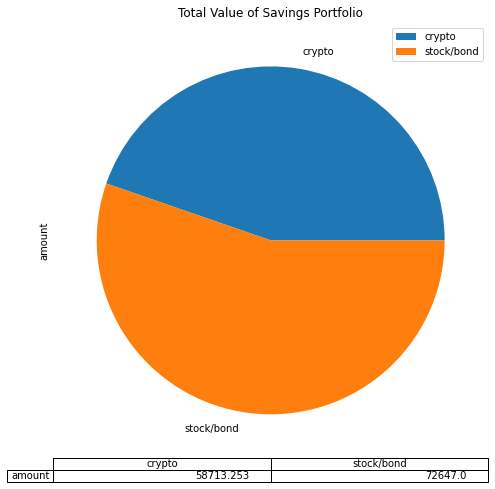

In [45]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
total_value = savings_df.sum()
crypto_string = f'{float(100 * total_crypto_wallet / total_value):,.2f}%'
stock_bond_string = f'{float(100 * total_stocks_bonds / total_value):,.2f}%'
table_values = {"Crypto:":crypto_string,"Stocks/Bonds":stock_bond_string}
plot_table_series = pd.Series(table_values)
display(table_values)

savings_df.plot(
    kind='pie',
    y='amount',
    title='Total Value of Savings Portfolio',
    figsize=(16,8),
    table=True
)



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [46]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [47]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congrats! You have enough money to create an Emergency Fund.')
elif total_portfolio == emergency_fund_value:
    print('Congrats! You have enough money to create an Emergency Fund.')
else:
    print(f'You do need ${emergency_fund_value - total_portfolio:,.2f} more in your portfolio to sufficientilly create an Emergency fund.')



Congrats! You have enough money to create an Emergency Fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [55]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
end_date = pd.Timestamp.today(tz='America/Tijuana')
start_date = (end_date - dt.timedelta(days = 1095))

# Set number of rows to 1000 to retrieve the maximum amount of rows
max_rows = 1000

In [57]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    symbols=tickers
    , timeframe=timeframe
    , limit=max_rows
    , end=end_date.isoformat()
).df.sort_index(ascending=False)


# Display both the first and last five rows of the DataFrame
while(prices_df.iloc[-1].name > start_date):
    last_date =  prices_df.iloc[-1].name
    countdown = last_date - dt.timedelta(days=1)

    prices = alpaca.get_barset(
        symbols=tickers
        , timeframe=timeframe
        , limit=max_rows
        , end=max_rows.isoformat()
    ).df.sort_index(ascending=False)
    prices_df = prices_df.append(prices)
else:
    # Display both the first and last five rows of the DataFrame
    prices_df = prices_df.loc[end_date:start_date].sort_index(ascending=True)
    display(prices_df)


AGG                                            \
                             open      high       low     close      volume   
time                                                                          
2019-02-05 00:00:00-05:00  106.95  107.1400  106.9500  107.0900   4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441   6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500   3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550   2988674.0   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999   2686282.0   
...                           ...       ...       ...       ...         ...   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.8100  10400422.0   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.7800  11437834.0   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.5900   9477222.0   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.7200   7424696.0   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.2700   9480330.0   

                              SPY                                            
                             open      high       low    close       volume  
time                                                                         
2019-02-05 00:00:00-05:00  272.44  273.4400  271.8800  273.130   61540042.0  
2019-02-06 00:00:00-05:00  272.79  273.3400  271.9200  272.700   43446324.0  
2019-02-07 00:00:00-05:00  270.94  271.5500  268.2900  269.970   83380785.0  
2019-02-08 00:00:00-05:00  268.75  270.2874  267.8300  270.080   63409417.0  
2019-02-11 00:00:00-05:00  271.20  271.4900  270.0300  270.640   57175393.0  
...                           ...       ...       ...      ...          ...  
2022-01-28 00:00:00-05:00  432.70  442.0000  427.8200  441.920  142062305.0  
2022-01-31 00:00:00-05:00  441.24  450.2800  439.8100  449.815  128202383.0  
2022-02-01 00:00:00-05:00  450.72  453.6300  446.9384  452.960  106515279.0  
2022-02-02 00:00:00-05:00  455.50  458.1200  453.0500  457.300   97807976.0  
2022-02-03 00:00:00-05:00  450.95  452.9700  445.7100  446.640   99110054.0  

[757 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [59]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
forcast_range = 7560
weight_distribution= [.4, .6]
num_samples = 500

monte_carlo_sim = MCSimulation(
    prices_df, 
    weights=weight_distribution,
    num_simulation=num_samples,
    num_trading_days=forcast_range,
)

# Review the simulation input data
display(monte_carlo_sim.portfolio_data)


AGG                                            \
                             open      high       low     close      volume   
time                                                                          
2019-02-05 00:00:00-05:00  106.95  107.1400  106.9500  107.0900   4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441   6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500   3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550   2988674.0   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999   2686282.0   
...                           ...       ...       ...       ...         ...   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.8100  10400422.0   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.7800  11437834.0   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.5900   9477222.0   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.7200   7424696.0   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.2700   9480330.0   

                                           SPY                               \
                          daily_return    open      high       low    close   
time                                                                          
2019-02-05 00:00:00-05:00          NaN  272.44  273.4400  271.8800  273.130   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.9200  272.700   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.2900  269.970   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.8300  270.080   
2019-02-11 00:00:00-05:00    -0.001445  271.20  271.4900  270.0300  270.640   
...                                ...     ...       ...       ...      ...   
2022-01-28 00:00:00-05:00     0.000806  432.70  442.0000  427.8200  441.920   
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.2800  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.6300  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.1200  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.9700  445.7100  446.640   

                                                     
                                volume daily_return  
time                                                 
2019-02-05 00:00:00-05:00   61540042.0          NaN  
2019-02-06 00:00:00-05:00   43446324.0    -0.001574  
2019-02-07 00:00:00-05:00   83380785.0    -0.010011  
2019-02-08 00:00:00-05:00   63409417.0     0.000407  
2019-02-11 00:00:00-05:00   57175393.0     0.002073  
...                                ...          ...  
2022-01-28 00:00:00-05:00  142062305.0     0.024695  
2022-01-31 00:00:00-05:00  128202383.0     0.017865  
2022-02-01 00:00:00-05:00  106515279.0     0.006992  
2022-02-02 00:00:00-05:00   97807976.0     0.009581  
2022-02-03 00:00:00-05:00   99110054.0    -0.023311  

[757 rows x 12 columns]

In [60]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988759,1.000113,1.007622,0.993426,1.004872,1.012786,1.007066,1.006090,0.983370,1.006241,...,0.995236,1.005629,0.998262,0.987513,1.002839,0.985194,0.992526,1.006193,0.990410,1.014110
2,1.000547,1.011825,1.003585,0.991362,1.014816,1.029833,1.004385,1.004270,0.981331,0.998251,...,1.002925,1.015625,0.996711,0.997030,1.001237,0.991097,0.999583,1.014680,0.995849,1.019692
3,1.013050,1.007542,1.005902,0.985496,1.021731,1.030280,0.992670,1.007363,0.990564,0.993164,...,1.001507,1.029147,1.003664,0.988978,1.021709,0.992298,0.997523,1.017535,1.002785,1.017778
4,1.021127,1.008535,1.009409,0.978704,1.016578,1.025133,0.999810,0.997711,0.986700,0.992298,...,0.999455,1.020388,0.995047,0.984353,1.011465,1.000684,0.995376,1.027941,0.988155,1.018908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.410656,9.202305,152.841710,48.821792,55.285425,62.338596,20.974410,57.763714,34.508399,44.008040,...,11.090430,35.165595,43.699382,14.747005,90.623692,36.358324,54.076679,16.448776,43.820542,56.851034
7557,35.308365,9.172910,151.993226,49.181765,55.547400,62.863203,21.071379,57.654901,35.147651,43.948901,...,11.071018,35.250070,43.833844,14.485554,90.858108,36.748772,54.280340,16.482461,44.184704,56.696421
7558,35.193503,9.147505,152.869840,49.768959,55.694527,63.315089,21.406716,57.505016,34.754537,43.745727,...,11.237191,35.288482,43.978802,14.462468,90.321373,36.530861,53.940793,16.352940,44.471754,55.907170
7559,35.419372,9.222517,151.964956,50.079735,55.112239,63.957340,21.372080,57.692437,35.035055,43.481422,...,11.063717,35.250717,44.423709,14.439682,89.873414,37.148167,53.913995,16.205280,44.749429,55.912643


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

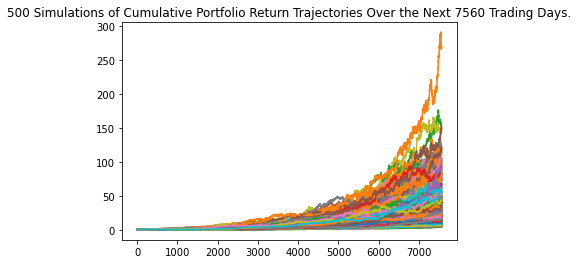

In [61]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
monte_carlo_sim.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

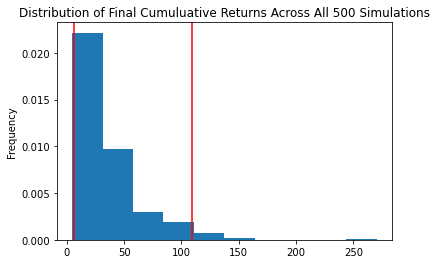

In [62]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
monte_carlo_sim.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [63]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mcs_stats = monte_carlo_sim.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
display(mcs_stats)

count           500.000000
mean             34.715536
std              28.709996
min               4.671299
25%              15.800365
50%              25.918159
75%              43.440506
max             270.112771
95% CI Lower      6.347382
95% CI Upper    108.911915
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [65]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'SPY ({spy_shares} Shares: ${spy_value:,.2f}')
print(f'AGG ({agg_shares} Shares: ${agg_value:,.2f}')
print(f"{' ':11s}Total: ${total_stocks_bonds:,.2f}")


SPY (110 Shares: $50,303.00
AGG (200 Shares: $22,344.00
           Total: $72,647.00


In [67]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mcs_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mcs_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f' Expected 30 Year return on ${total_stocks_bonds:,.2f} is between ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f} wiht 95% confidence level.')

 Expected 30 Year return on $72,647.00 is between $461,118.29 and $7,912,123.90 wiht 95% confidence level.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [68]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
forcast_range = 10 * 252
weight_distribution = [.2, .8]
sample_size = 500 
# Review the simulation input data
mcs_AGG20_SPY80 = MCSimulation(
    prices_10y_df, 
    weights = weight_distribution, 
    num_simulation= sample_size, 
    num_trading_days= forcast_range
)

display(mcs_AGG20_SPY80.portfolio_data)

AGG                                            \
                             open      high       low     close      volume   
time                                                                          
2019-02-05 00:00:00-05:00  106.95  107.1400  106.9500  107.0900   4918385.0   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441   6022187.0   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500   3080898.0   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550   2988674.0   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999   2686282.0   
...                           ...       ...       ...       ...         ...   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.8100  10400422.0   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.7800  11437834.0   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.5900   9477222.0   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.7200   7424696.0   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.2700   9480330.0   

                                           SPY                               \
                          daily_return    open      high       low    close   
time                                                                          
2019-02-05 00:00:00-05:00          NaN  272.44  273.4400  271.8800  273.130   
2019-02-06 00:00:00-05:00    -0.000429  272.79  273.3400  271.9200  272.700   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.2900  269.970   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.8300  270.080   
2019-02-11 00:00:00-05:00    -0.001445  271.20  271.4900  270.0300  270.640   
...                                ...     ...       ...       ...      ...   
2022-01-28 00:00:00-05:00     0.000806  432.70  442.0000  427.8200  441.920   
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.2800  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.6300  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.1200  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.9700  445.7100  446.640   

                                                     
                                volume daily_return  
time                                                 
2019-02-05 00:00:00-05:00   61540042.0          NaN  
2019-02-06 00:00:00-05:00   43446324.0    -0.001574  
2019-02-07 00:00:00-05:00   83380785.0    -0.010011  
2019-02-08 00:00:00-05:00   63409417.0     0.000407  
2019-02-11 00:00:00-05:00   57175393.0     0.002073  
...                                ...          ...  
2022-01-28 00:00:00-05:00  142062305.0     0.024695  
2022-01-31 00:00:00-05:00  128202383.0     0.017865  
2022-02-01 00:00:00-05:00  106515279.0     0.006992  
2022-02-02 00:00:00-05:00   97807976.0     0.009581  
2022-02-03 00:00:00-05:00   99110054.0    -0.023311  

[757 rows x 12 columns]

In [70]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mcs_AGG20_SPY80.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981683,0.982011,1.016548,1.011808,0.996156,1.019357,1.015794,1.008697,1.014367,1.014242,...,1.005688,1.001054,1.014397,0.989185,1.011820,1.002143,1.019228,0.993712,1.000955,0.984820
2,0.987407,0.982295,1.020071,1.036391,1.004385,1.026878,1.026730,1.011198,1.008402,1.023956,...,1.010794,0.979274,1.014539,0.994481,1.011160,1.005346,1.041738,0.993207,1.017037,0.972730
3,0.989480,0.997193,1.019136,1.030021,1.005170,1.044654,1.041079,0.995668,0.992231,1.006686,...,1.006895,0.984151,1.017429,0.979793,1.003814,1.022352,1.024981,1.005344,1.020728,0.986099
4,0.979372,1.012507,1.023085,1.031979,1.017928,1.043001,1.021362,0.983719,0.994077,1.001654,...,0.992620,0.981807,1.008657,0.977527,1.003255,1.042334,1.019856,1.023141,1.022068,0.999325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.380534,5.330194,6.305517,5.477797,1.736260,3.564722,10.463189,1.893734,5.427014,3.990655,...,11.296077,4.362154,3.923401,11.671147,2.172185,7.070680,3.088886,13.448630,3.489984,7.968914
2517,8.489676,5.331622,6.287910,5.452274,1.744500,3.618011,10.487227,1.839658,5.499622,3.957935,...,11.128148,4.425957,3.916157,11.445422,2.170841,7.070287,3.122225,13.564760,3.447948,7.803601
2518,8.402808,5.415799,6.301503,5.414201,1.764596,3.727689,10.437978,1.799716,5.408144,3.914911,...,11.012060,4.402585,3.957621,11.422784,2.156152,6.949665,3.106765,13.579738,3.453274,7.647971
2519,8.426436,5.437192,6.184836,5.374400,1.767011,3.817952,10.447124,1.842678,5.348935,3.859681,...,10.989370,4.410972,4.021438,11.438646,2.198020,7.015496,3.137818,13.429351,3.430577,7.575115


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

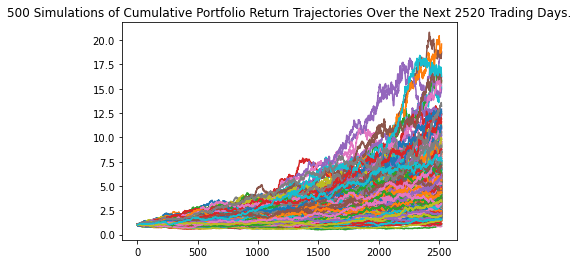

In [71]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mcs_AGG20_SPY80.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

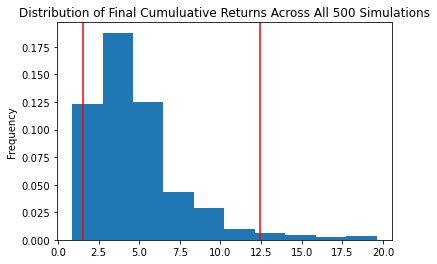

In [72]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mcs_AGG20_SPY80.plot_distribution()


In [73]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mcs_agg20_spy80_stats = mcs_AGG20_SPY80.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
display(mcs_agg20_spy80_stats)

count           500.000000
mean              4.788628
std               2.842115
min               0.870581
25%               2.837619
50%               4.162191
75%               5.761218
max              19.605579
95% CI Lower      1.533811
95% CI Upper     12.406069
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [74]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"SPY ({spy_shares} Shares): ${spy_value:,.2f}")
print(f"AGG ({agg_shares} Shares): ${agg_value:,.2f}")
print(f"{'':11s}Total: ${total_stocks_bonds:,.2f}")


SPY (110 Shares): $50,303.00
AGG (200 Shares): $22,344.00
           Total: $72,647.00


In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mcs_agg20_spy80_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mcs_agg20_spy80_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"Expected 10 year return on ${total_stocks_bonds:,.2f} is between ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f} with 95% confidence interval.")


Expected 10 year return on $72,647.00 is between $111,426.80 and $901,263.73 with 95% confidence interval.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?